# Dancer's business - 5. Local dance studio revenue and discussions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
import scipy.stats as stats

In [2]:
df = pd.read_csv('data/dance4.csv')

In [23]:
# Area to look
area = ['LA','SanFran','Seattle','NY','Chicago','All'] # All: U.S.

# Predict local dance studio revenue $R_{Dance,~city}$

Writing the formula introduced in the beginning again, we will calculate
the dance studio revenue in each area by
$$\begin{aligned}
R_{Dance,~city} 
&= r_{biz}R_{Gym,~city}\\
&= r_{biz}g_{prod}V_{Gym,~city}.
\end{aligned}$$

We just got $R_{Gym,~city}$, so let's get $r_{biz}R_{Gym,~city}$

## Uncertainty of $rR$, when $r$ is a constant

$$\sigma_{rR} = r*\sigma_{R}$$

In [4]:
def ep_const_mul(a,x):
        
        return a*x

def ep_const_mul_err(a,x,ex):
        
        return a*ex

In [5]:
# Predicted local dance studio revenue
df['dance_studio_rev_pred'] = \
    df.apply(lambda x: ep_const_mul(x['r_biz'],x['fitness_rev_pred']) if x['occ']=='fitness_biz' else np.nan, axis=1)

df['dance_studio_rev_pred_err'] =\
    df.apply(lambda x: ep_const_mul_err(x['r_biz'],x['fitness_rev_pred'],x['fitness_rev_pred_err']) \
             if x['occ']=='fitness_biz' else np.nan, axis=1)

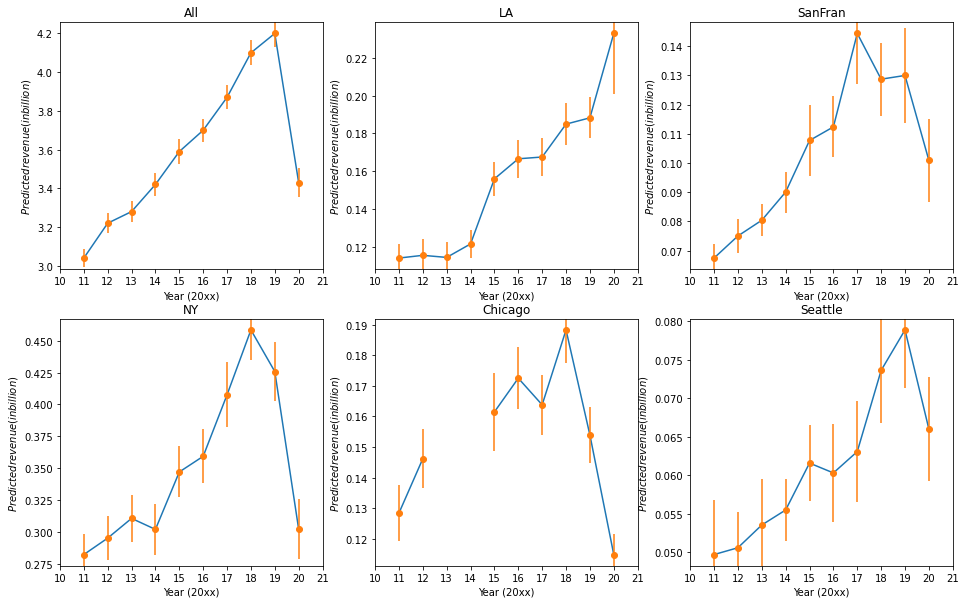

In [6]:
# Plot area dance studio revenue result
plt.rcParams["figure.figsize"] = [16, 10]

fig, ax_arr = plt.subplots(2,3)

for i in range(len(area)):  

    t = df[(df.area==area[i])&(df.occ=='fitness_biz')][['year','dance_studio_rev_pred','dance_studio_rev_pred_err']]

    ax = ax_arr[i//3,i%3]
    
    x = t.year-2000
    y = t.dance_studio_rev_pred
    yerr = t.dance_studio_rev_pred_err
    
    ax = ax_arr[i//3,i%3]

    ax.plot(x, y)
    ax.errorbar(x, y, yerr, fmt ='o')

    ax.set_title(area[i])
    ax.set_xlabel('Year (20xx)')
    ax.set_ylabel('$Predicted revenue (in billion $)')
    ax.set_xticks(np.arange(10, 22, 1.0))    
     

# Result summary
Finally, we got the prediction of dance studio revenue in each local area. How this result sounds like?
- Basically, those graphs have the same shapes of local fitness employment volume, number of employee in that area multiplied by their average annual salary, then scaled by $r_{biz}g_{prod}$, which is same between all area.
- With a cross check with the NY's fitness revenue prediction with actual values, using $g_{prod}$ obtained from the national statistics gave quite close prediction of the local fitness revenue. 
- However, is there any industrial or local factor that makes using $r_{biz}$ obtained from the national statistics to predict local revenue not to be accurate? Let's check a few things

# Nationwide dancer and dance studio statistics

## Estimate and plot nationwide data

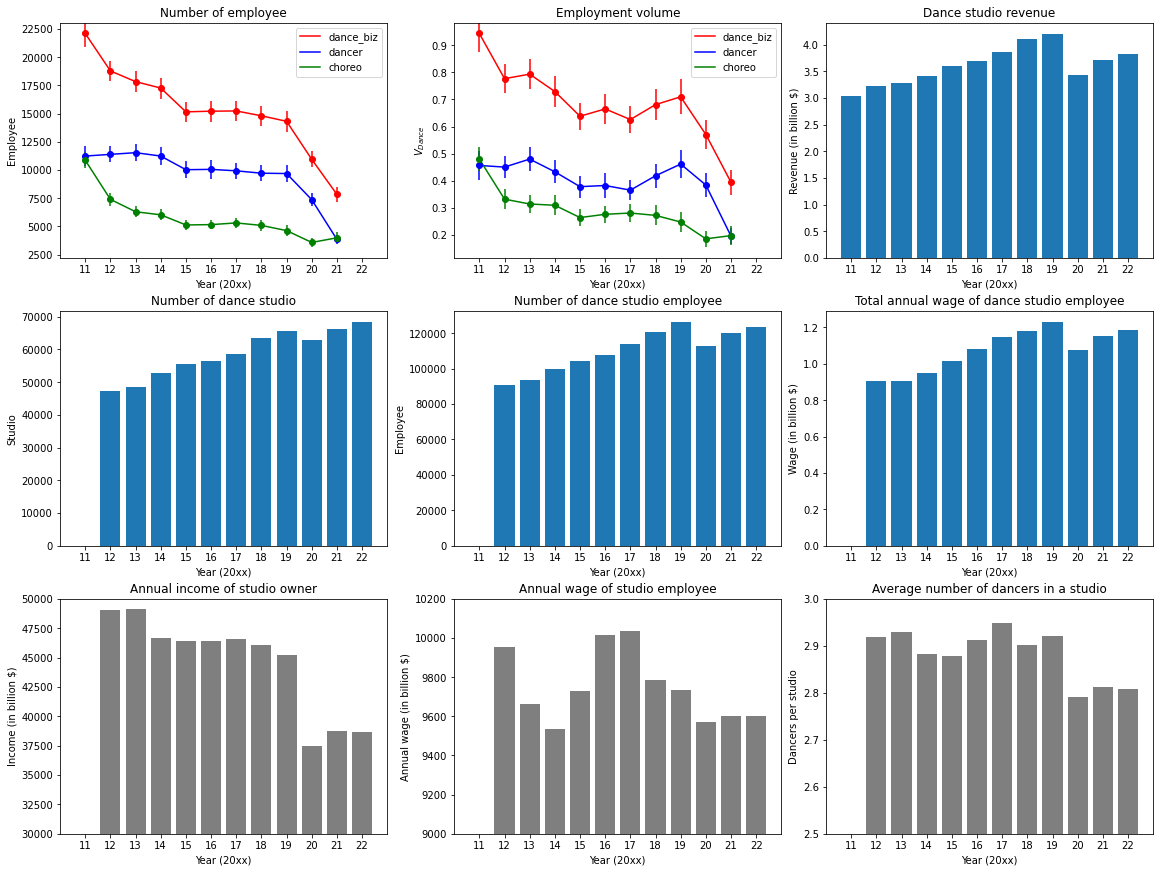

In [7]:
# Plot dancer population
plt.rcParams["figure.figsize"] = [16, 12]

fig, ax_arr = plt.subplots(3,3,constrained_layout=True)


color = ['r','b','g','r','c','y']

# Employee population and Volume
for i in range(2):
    ijob=0
    for job in ('dance_biz', 'dancer', 'choreo'):
    
        t = df[(df.area=='All')&(df.occ==job)&(df.year>2010)]

        x = t.year-2000
        
        if i==0:
            y = t.tot_emp
            yerr = t.emp_err
        else:
            y = t.vol
            yerr = t.vol_err            

        ax = ax_arr[0][i]

        ax.plot(x, y, color=color[ijob], label=job)
        ax.errorbar(x, y, yerr, fmt ='o', color=color[ijob])
        
        ijob+=1
    
    if i==0:
        ax.set_title('Number of employee')
        ax.set_ylabel('Employee')
    else:
        ax.set_title('Employment volume')
        ax.set_ylabel('$V_{Dance}$')    
    ax.set_xlabel('Year (20xx)')
    ax.set_xticks(np.arange(11, 23, 1))   
    ax.legend()
    ax.set_xlim(10,23)

# Dance studio statistics ---
t = df[(df.area=='All')&(df.occ=='all_jobs')]

# Revenue
ax = ax_arr[0][2]

x = t.year-2000
y = t.dance_studio

ax.bar(x, y)
ax.set_title('Dance studio revenue')
ax.set_xlabel('Year (20xx)')
ax.set_ylabel('Revenue (in billion $)')
_ = ax.set_xticks(np.arange(11,23, 1.0))
ax.set_xlim(10,23)

# Number of studio
ax = ax_arr[1][0]

x = t.year-2000
y = t.studio_num

ax.bar(x, y)
ax.set_title('Number of dance studio')
ax.set_xlabel('Year (20xx)')
ax.set_ylabel('Studio')
_ = ax.set_xticks(np.arange(11,23, 1.0))
ax.set_xlim(10,23)

# Number of studio employee
ax = ax_arr[1][1]

x = t.year-2000
y = t.studio_emp

ax.bar(x, y)
ax.set_title('Number of dance studio employee')
ax.set_xlabel('Year (20xx)')
ax.set_ylabel('Employee')
_ = ax.set_xticks(np.arange(11,23, 1.0))
ax.set_xlim(10,23)

# Total annual wage of studio employee 
ax = ax_arr[1][2]

x = t.year-2000
y = t.studio_wage

ax.bar(x, y)
ax.set_title('Total annual wage of dance studio employee')
ax.set_xlabel('Year (20xx)')
ax.set_ylabel('Wage (in billion $)')
_ = ax.set_xticks(np.arange(11,23, 1.0))
ax.set_xlim(10,23)

# Average annual income of the studio owner
    # Assumed the number of owner = number of studio
    # Assumed both the owner and employee are dancers/choreographers
    
df['studio_owner_a_mean'] = np.nan 
df['studio_emp_a_mean']  = np.nan 
df['studio_num_dancer']  = np.nan 


df.loc[(df.area=='All')&(df.occ=='all_jobs'),'studio_owner_a_mean'] = \
    (df.dance_studio-df.studio_wage)/df.studio_num *1000000000 # billion to a dollar

df.loc[(df.area=='All')&(df.occ=='all_jobs'),'studio_emp_a_mean'] = \
    df.studio_wage/df.studio_emp *1000000000 # billion to a dollar

df.loc[(df.area=='All')&(df.occ=='all_jobs'),'studio_num_dancer'] = \
    (df.studio_num + df.studio_emp)/t.studio_num # owner+employee dancers /#studio

t = df[(df.area=='All')&(df.occ=='all_jobs')]
    
# Number of studio
ax = ax_arr[2][0]

x = t.year-2000
y = t.studio_owner_a_mean

ax.bar(x, y, color='tab:gray')
ax.set_title('Annual income of studio owner')
ax.set_xlabel('Year (20xx)')
ax.set_ylabel('Income (in billion $)')
ax.set_ylim(30000,50000)
_ = ax.set_xticks(np.arange(11,23, 1.0))
ax.set_xlim(10,23)

# Number of studio employee
ax = ax_arr[2][1]

x = t.year-2000
y = t.studio_emp_a_mean

ax.bar(x, y, color='tab:gray')
ax.set_title('Annual wage of studio employee')
ax.set_xlabel('Year (20xx)')
ax.set_ylabel('Annual wage (in billion $)')
ax.set_ylim(9000,10200)
_ = ax.set_xticks(np.arange(11,23, 1.0))
ax.set_xlim(10,23)

# Total annual wage of studio employee 
ax = ax_arr[2][2]

x = t.year-2000
y = t.studio_num_dancer

ax.bar(x, y, color='tab:gray')
ax.set_title('Average number of dancers in a studio')
ax.set_xlabel('Year (20xx)')
ax.set_ylabel('Dancers per studio')
ax.set_ylim(2.5,3)
_ = ax.set_xticks(np.arange(11,23, 1.0))
_ = ax.set_xlim(10,23)


### First row
- Contrary to expectation, neither of dance business's national employee population nor volume follows the trend of the national dance studio revenue. While the revenue was kept growing, the employment volume was kept dropping.
- Note that while choreographer's annual wage is available, that of dancer's is not. Dancer's annual wage is calculatd by multiplying 2080 to hourly wage, and this number is also used to calculate dance\_biz.

### Second row
- The total number of studio and employee are growing.

### Third row (estimation using the 3-6th plots)
- The annual income of an owner sounds reasonable. One of the best belly dance teacher I know takes about \\$90 for a 6 weeks class. Then annual income estimation can be (50 weeks / 6 weeks)\* \\$90 \* 30 students \* 2 courses = \\$45,000 approximately. 
- The average wage of a dance studio employee is about \\$10000. Assuming their hourly wage is \\$20-40, their working hours per week becomes \\$10000/($20-40)/50 weeks = 5-10 hours. This value sounds typical.
- The number of dancers 2-3 also matches with typical dance studios I've been.
- While the total revenue and the number of studio are increasing over years, the individual's incomes are decreasing.
- Considering the decreasing number of average dancers in a studio, the more and more dancers are becoming an independent owners.
- The number of studio owner and employee trend is opposite of the dancer and choreographer employment data, and their size is about 10 times different. The government's dancer and choreographer statistics might not include those who work at dance studios.

# Estimate the number of dance studio in local area

## Number of studio vs Number of employee or Revenue
I'd like to predict the number of dance studio in a local area.
Then to do that, I want to find a variable which has the most correlation with the number of studio.
What it will be? Dance studio revenue? Finess revenue? Number of population? Number of fitness employee? or Number of dancers? Let's check that with linear regression and goodness-of-fit test.

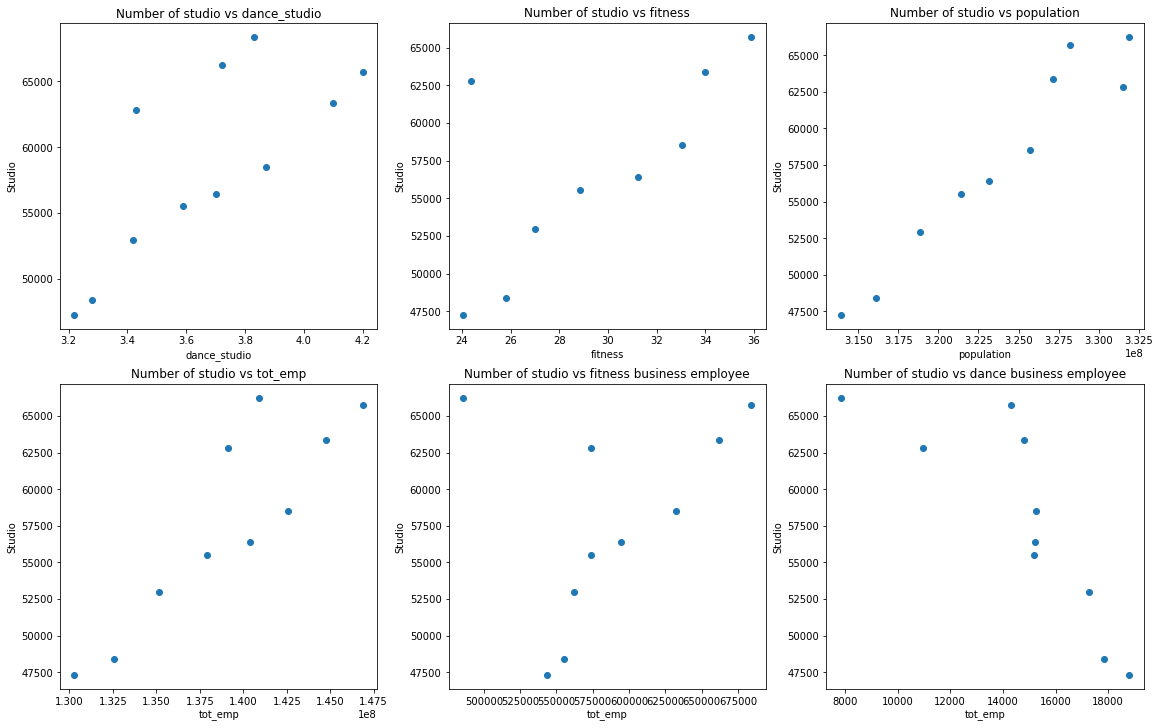

In [8]:
# Plot dancer population
plt.rcParams["figure.figsize"] = [16, 10]

fig, ax_arr = plt.subplots(2,3,constrained_layout=True)

# Dance studio statistics ---

## For later test
X = []
Y = []

item = ['dance_studio','fitness','population','tot_emp','tot_emp','tot_emp']

for i in range(len(item)):
    
    title = 'Number of studio vs '+item[i]
    
    if i==4:
        t = df[(df.area=='All')&(df.occ=='fitness_biz')]
        title = 'Number of studio vs fitness business employee'
    elif i==5:
        t = df[(df.area=='All')&(df.occ=='dance_biz')]
        title = 'Number of studio vs dance business employee'
    else:
        t = df[(df.area=='All')&(df.occ=='all_jobs')]
        
        
    ax = ax_arr[i//3,i%3]

    x = t[item[i]]
    y = t.studio_num
    temp = pd.DataFrame({'x':x,'y':y})
    temp = temp.dropna()
    
    X.append(temp.x.to_numpy())
    Y.append(temp.y.to_numpy())

    ax.scatter(x, y)
    ax.set_title(title)
    ax.set_xlabel(item[i])
    ax.set_ylabel('Studio')

## Goodness-of-fit: Chi-square test
To rank the best variable to use, I'll perform the linear regression and calculate the goodness of fit of each plot. If you are curious about what it means, visit: [Link to my blog post](https://minjung-mj-kim.github.io/stat-num/linreg-htest/).

Since the error of the number of studio is not provided, I'll give equal uncertainties to all data points.

In [9]:
var = ['dance studio revenue','fitness revenue',
       'resident population','resident total employee',
       'fitness employee','dance employee']

Y_pred = []

for i in range(len(var)):
    
    # Linear regression
    model = LinearRegression()   
    model.fit(X = X[i].reshape(-1, 1), y = Y[i])    

    Y_pred.append(model.predict(X[i].reshape(-1, 1)))

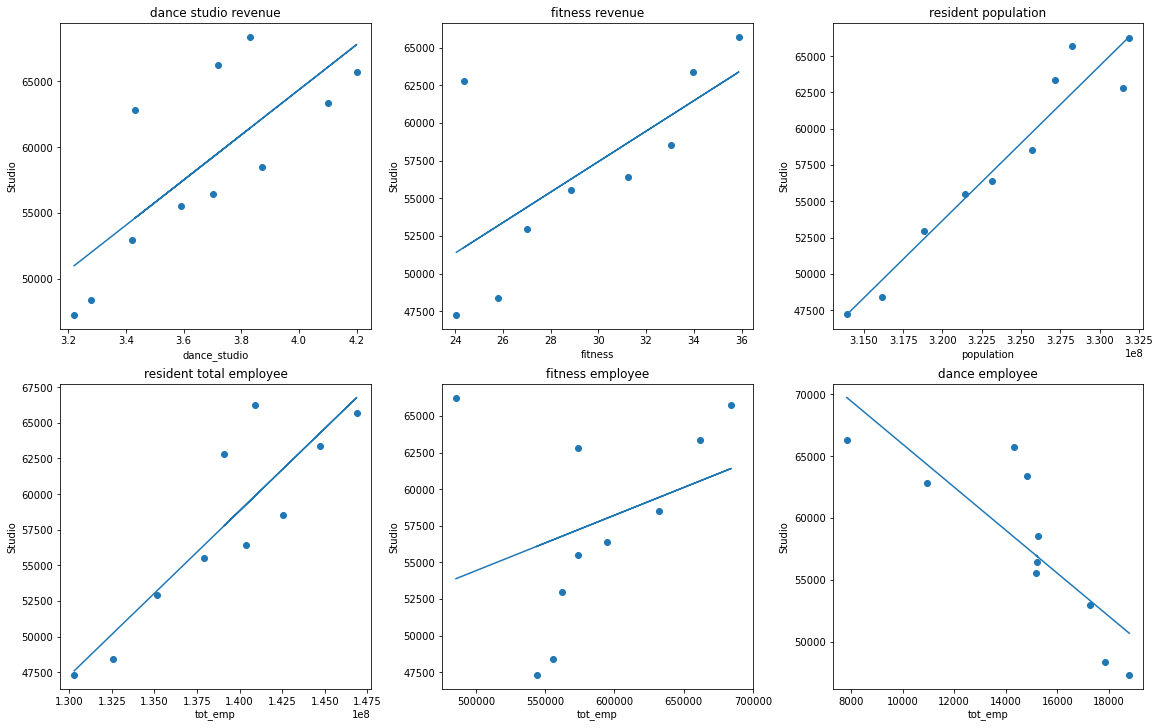

In [10]:
# Plot dancer population
plt.rcParams["figure.figsize"] = [16, 10]

fig, ax_arr = plt.subplots(2,3,constrained_layout=True)

# Plot regression result
item = ['dance_studio','fitness','population','tot_emp','tot_emp','tot_emp']

for i in range(len(item)):
    
    title = 'Number of studio vs '+item[i]
    
    if i==4:
        t = df[(df.area=='All')&(df.occ=='fitness_biz')]
        title = 'Number of studio vs fitness business employee'
    elif i==5:
        t = df[(df.area=='All')&(df.occ=='dance_biz')]
        title = 'Number of studio vs dance business employee'
    else:
        t = df[(df.area=='All')&(df.occ=='all_jobs')]
        
        
    ax = ax_arr[i//3,i%3]

    x = t[item[i]]
    y = t.studio_num

    temp = pd.DataFrame({'x':x,'y':y})
    temp = temp.dropna()
        
    x = temp.x.to_numpy()
    y = temp.y.to_numpy()
    
    ax.scatter(x, y)
    ax.plot(x, Y_pred[i])
    ax.set_title(var[i])
    ax.set_xlabel(item[i])
    ax.set_ylabel('Studio')
    
    if i==4:
        ax.set_xticks(np.arange(500000,750000,50000))

In [11]:
# Goodness of fit
nu = len(X[0])-2 # degree of freedom

for i in range(len(var)):

    chisq, p = stats.chisquare(f_obs=Y[i], f_exp=Y_pred[i])
    print(var[i], chisq/2, p)

dance studio revenue 1957.6874095486573 0.0
fitness revenue 1742.7491808505536 0.0
resident population 226.82212120413996 4.7685080578473904e-92
resident total employee 775.7284478658613 0.0
fitness employee 3373.685670215702 0.0
dance employee 1152.4607556809851 0.0


The chisquare result is large with p values close to 0.
It is normal for such noisy data.
Still, the chisquare value tells relatively good fitting results.
From this test, the most relevant variable to the number of dance studio is the total population.
I guess that dancers open the studio based on the potential number of customers, proportional to the population.
So let's use the resident population $P_{city}$ to predict the number of local fitness studio $N_{Studio,~city}$ using $k$ optained from the nationwide data

$$N_{Studio,~U.S.} = kP_{U.S.}.$$

## Get $k$

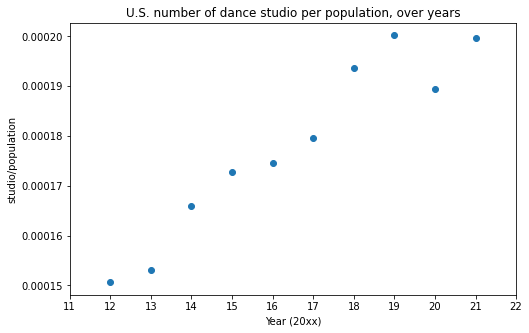

In [12]:
# Select U.S. entire fitness employee statistics
plt.rcParams["figure.figsize"] = [8, 5]
fig, ax_arr = plt.subplots()

# number of studio/population, yearly
ax = ax_arr

t = df[(df.area=='All')&(df.occ=='all_jobs')]
x = t.year-2000
y = t.studio_num/t.population

t.index=t.year
k_density = t.studio_num/t.population
k_density.dropna(inplace=True)

ax.scatter(x, y)
ax.set_title('U.S. number of dance studio per population, over years')
ax.set_xlabel('Year (20xx)')
_ = ax.set_ylabel('studio/population')
_ = ax.set_xticks(np.arange(11,23, 1))

## Predict local dance studio numbers

In [16]:
df = df.merge(pd.DataFrame({'year':k_density.index, 'k_density':k_density.tolist()}), how='inner', on='year')

In [18]:
df.sample(3)

,year,area,cpi,cli,population,fitness,dance_studio,studio_num,studio_emp,studio_wage,...,g_prod_err,fitness_rev_pred,fitness_rev_pred_err,dance_studio_rev_pred,dance_studio_rev_pred_err,studio_owner_a_mean,studio_emp_a_mean,studio_num_dancer,studio_num_pred,k_density
395,2021,Seattle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000200
257,2018,Seattle,271.089,121.4,3935179.0,33.971,4.10,63363.0,120456.0,1.1787,...,0.017742,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000194
54,2013,LA,239.207,136.4,13097434.0,25.803,3.28,48399.0,93420.0,0.9029,...,0.019494,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000153


In [20]:
df['studio_num_pred'] = df.population*df.k_density

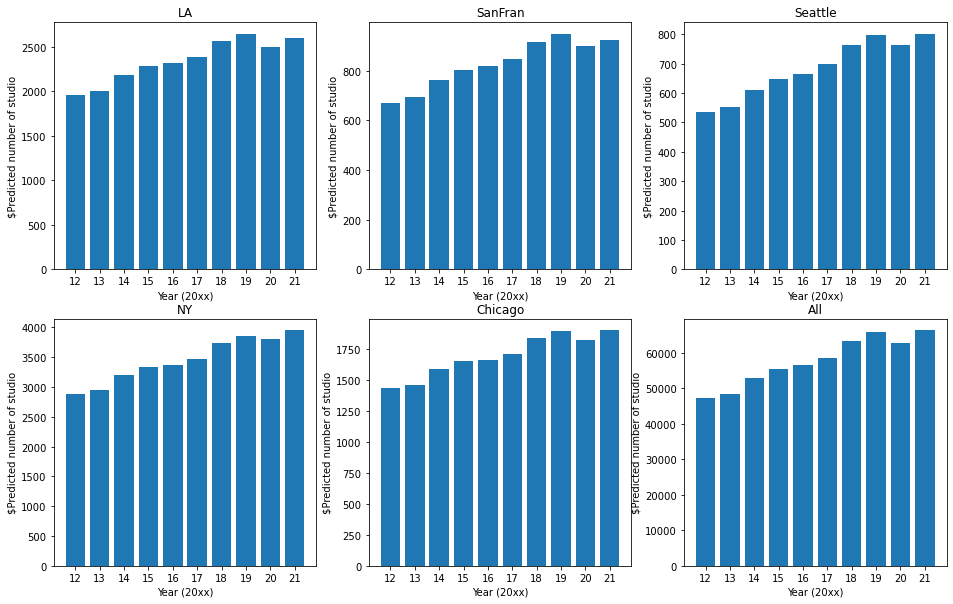

In [25]:
# Plot number of local dance studio
plt.rcParams["figure.figsize"] = [16, 10]

fig, ax_arr = plt.subplots(2,3)

for i in range(len(area)):  

    t = df[(df.area==area[i])&(df.occ=='all_jobs')]

    ax = ax_arr[i//3,i%3]
    
    x = t.year-2000
    y = t.studio_num_pred
    
    ax = ax_arr[i//3,i%3]

    ax.bar(x, y)

    ax.set_title(area[i])
    ax.set_xlabel('Year (20xx)')
    ax.set_ylabel('$Predicted number of studio')
    ax.set_xticks(np.arange(12, 22, 1.0))    

Do this numbers sounds right?
Let's do a quick check.

![Google map of dance studio search](image/google.jpg)

This is a random Manhattan area, size of 1.6 km x 3.2 km = 5.1 km2, and there are 106 dance studio search results. (Keep in mind that this number can be overestimated due to google's generous selection. Search results start to include non-dance studios from 60-80 th result page.)
Since the size of Manhattan is 59 km2, there will be 106/5.1 km2 \* 59 km2 = 1200 dance studios in Manhattan.

The population in Manhattan is 1.6 millions, whereas the population in NY MSA is 20 millions.
By simply multiplying this number, there should be 1200\*20/1.6 = 15k studios, which is 4-5 times of the above prediction.
Since the studio density $k_{density}$ is estimated for the total U.S. population, the demand at urban area could be higher.

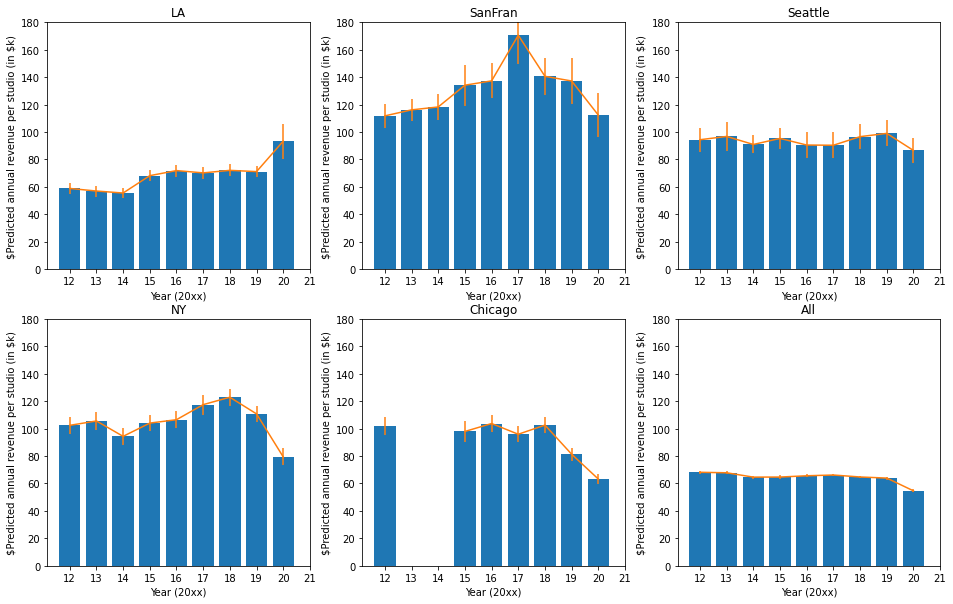

In [49]:
# Plot revenue per dance studio 
plt.rcParams["figure.figsize"] = [16, 10]

fig, ax_arr = plt.subplots(2,3)

for i in range(len(area)):  

    t = df[(df.area==area[i])&(df.occ=='fitness_biz')]

    ax = ax_arr[i//3,i%3]
    
    x = t.year-2000
    y = t.dance_studio_rev_pred/t.studio_num_pred*1000000 # billions to a k
    yerr = t.dance_studio_rev_pred_err/t.studio_num_pred*1000000
    
    
    ax = ax_arr[i//3,i%3]

    ax.bar(x, y)
    ax.errorbar(x, y, yerr, color='tab:orange')

    ax.set_title(area[i])
    ax.set_ylim(0,180)
    ax.set_xlabel('Year (20xx)')
    ax.set_ylabel('$Predicted annual revenue per studio (in \$k)')
    ax.set_xticks(np.arange(12, 22, 1.0))    

Finally, we obtained the expected revenue of a dance studio in each area.
How do you think?

- ("All" area, cross check purpose) Previously, we saw that the average income of a studio owner is \\$40k, an employee takes \\$10k, and typically a studio hires 2 employees, so the total average revenue should be around \\$60k in U.S. average area, which looks right.


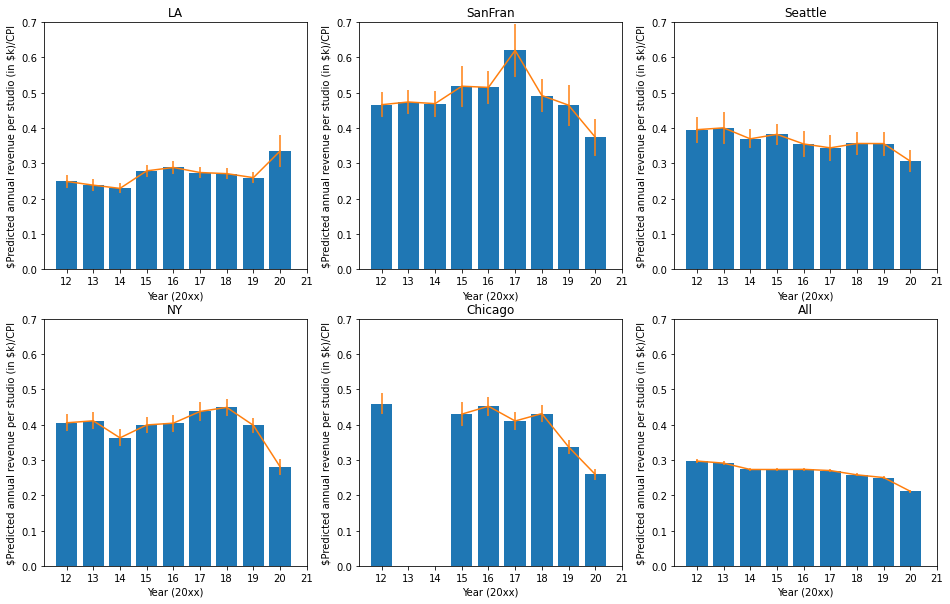

In [42]:
# Plot revenue per dance studio / CPI
plt.rcParams["figure.figsize"] = [16, 10]

fig, ax_arr = plt.subplots(2,3)

for i in range(len(area)):  

    t = df[(df.area==area[i])&(df.occ=='fitness_biz')]

    ax = ax_arr[i//3,i%3]
    
    x = t.year-2000
    y = t.dance_studio_rev_pred/t.studio_num_pred*1000000/t.cpi # billions to a k
    yerr = t.dance_studio_rev_pred_err/t.studio_num_pred*1000000/t.cpi
    
    
    ax = ax_arr[i//3,i%3]

    ax.bar(x, y)
    ax.errorbar(x, y, yerr, color='tab:orange')

    ax.set_title(area[i])
    ax.set_xlabel('Year (20xx)')
    ax.set_ylabel('$Predicted annual revenue per studio (in \$k)/CPI')
    ax.set_ylim(0,0.7)
    ax.set_xticks(np.arange(12, 22, 1.0))    

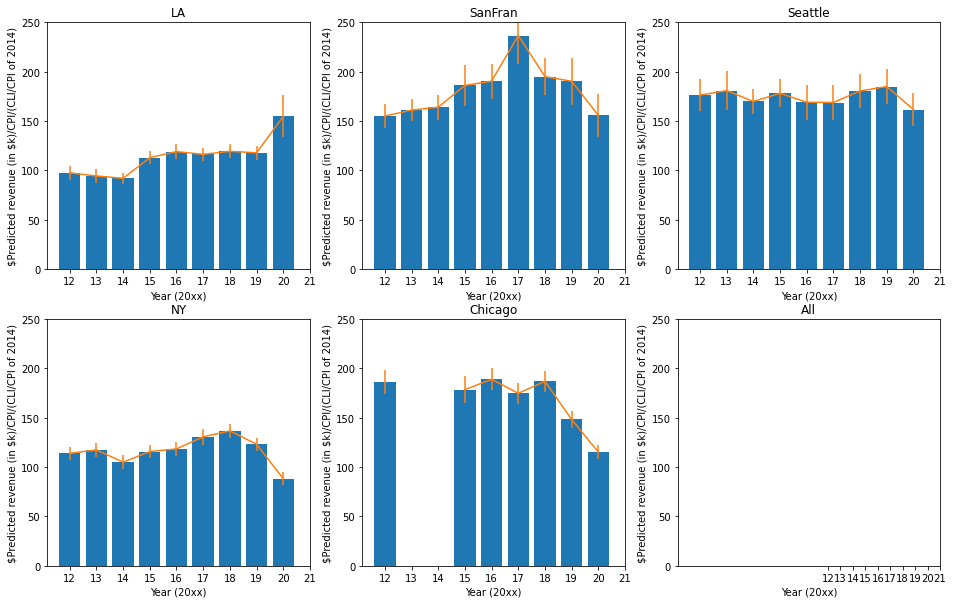

In [48]:
# Plot revenue per dance studio / CPI and Cost of living
plt.rcParams["figure.figsize"] = [16, 10]

fig, ax_arr = plt.subplots(2,3)

for i in range(len(area)):  

    t = df[(df.area==area[i])&(df.occ=='fitness_biz')]

    ax = ax_arr[i//3,i%3]
    
    x = t.year-2000
    y = t.dance_studio_rev_pred/t.studio_num_pred*1000000/t.cli_cpi # billions to a k
    yerr = t.dance_studio_rev_pred_err/t.studio_num_pred*1000000/t.cli_cpi
    
    
    ax = ax_arr[i//3,i%3]

    ax.bar(x, y)
    ax.errorbar(x, y, yerr, color='tab:orange')

    ax.set_title(area[i])
    ax.set_xlabel('Year (20xx)')
    ax.set_ylabel('$Predicted revenue (in \$k)/CPI/(CLI/CPI of 2010)')
    ax.set_ylim(0,250)
    ax.set_xticks(np.arange(12, 22, 1.0))   

# Discussion and Conclusion

## Findings for Dancers

- Fitness 해라
    - 전망 더 좋음.
    - 주 40시간 일한다면 고용 연봉이 스튜디오 운영비랑 차이 안남.
    - 근데 댄서로 고용되면 또 다르네.
- Studio 해라
    - 더 loyal 한것같다.
    - 실제로 주 40시간을 수업으로 할 수는 없다. 운영 자신있음 해봐라. 근데 매우 skewed된거 알아두길.
- 지역 선택
    - 댄서 시급만 보면 시애틀이나 LA가 좋아보인다.
    - 스튜디오 물가 보정한것만 보면 시애틀이나 LA가 좋아보인다.
    - Pitfall: 
        - 지역별 특이사항 있을 수 있음.
        - 2010 물가 기준, CLI변동되었나 봐야함.
        - 가격이 다는 아님. 커리어 생각하면 너네 분야 댄서 수 자체가 많은데 가는게 좋을수도.
    - 코로나 이후의 트렌드를 예측하기 어렵다.
- 나라면 
    - 시애틀이나 LA에서, population에 비해 dance studio가 적은 지역을 찾아, 
    - fitness 강사를 고용해서 fitness 프로그램을 같이 운영해 오래 돌리겠다.


## Dancer population of local area
Interest of dance can be different between area, and that might change the fraction of dance studio customer over the fitness studio.

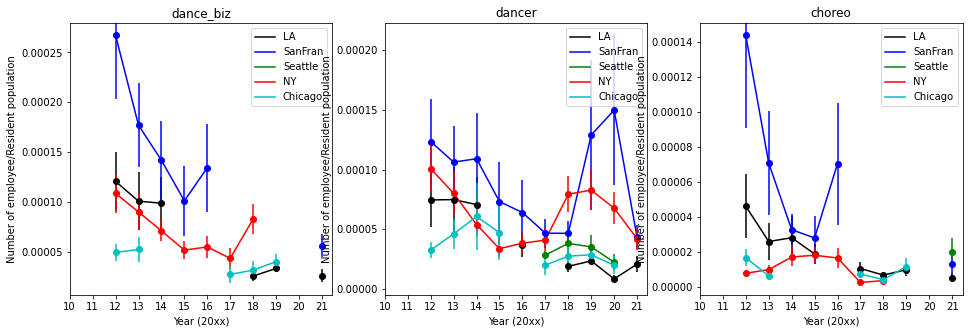

In [36]:
# Plot dancer population
plt.rcParams["figure.figsize"] = [16, 5]

fig, ax_arr = plt.subplots(1,3)

ijob=0
color = ['k','b','g','r','c','y']
for job in ('dance_biz', 'dancer', 'choreo'):
    
    for i in range(len(area)):  
        
        if area[i]=='All':
            continue

        t = df[(df.area==area[i])&(df.occ==job)]

        x = t.year-2000
        y = t.tot_emp/t.population
        yerr = t.emp_err/t.population

        ax = ax_arr[ijob]

        ax.plot(x, y, color=color[i], label=area[i])
        ax.errorbar(x, y, yerr, fmt ='o', color=color[i])

    ax.set_title(job)
    ax.set_xlabel('Year (20xx)')
    ax.set_ylabel('Number of employee/Resident population')
    ax.set_xticks(np.arange(10, 22, 1.0))   
    ax.legend()
    
    ijob+=1

As can be seen here, the number of dancers per population varies depending on area. However, dancer's employee statistics didn't make a good prediction of dance studio revenue, so we can't use this data for any revenue correction between area. However, it is still an indicator of different interest in dance bewteen area. Any local dance studio revenue statistics will help a lot to improve this analysis.